In [2]:
import pandas as pd

In [3]:
Data = pd.read_excel('Bitcoin.xlsx')


In [4]:
import pandas as pd

# Convert columns to numeric in the "Data" DataFrame
Data['Price'] = Data['Price'].str.replace(',', '')
Data['Open'] = Data['Open'].str.replace(',', '')
Data['High'] = Data['High'].str.replace(',', '')
Data['Low'] = Data['Low'].str.replace(',', '')

Data['Price'] = pd.to_numeric(Data['Price'], errors='coerce')
Data['Open'] = pd.to_numeric(Data['Open'], errors='coerce')
Data['High'] = pd.to_numeric(Data['High'], errors='coerce')
Data['Low'] = pd.to_numeric(Data['Low'], errors='coerce')
Data['Vol.'] = pd.to_numeric(Data['Vol.'].str.replace('K', '').str.replace(',', ''), errors='coerce')
Data['Change %'] = pd.to_numeric(Data['Change %'].str.replace('%', ''), errors='coerce')
Data['FGI'] = pd.to_numeric(Data['FGI'], errors='coerce')
Data['Puell Multiple'] = pd.to_numeric(Data['Puell Multiple'], errors='coerce')
Data['Mayer Multiple'] = pd.to_numeric(Data['Mayer Multiple'], errors='coerce')


In [5]:
inverted_data = Data[::-1]
Data = inverted_data.reset_index(drop=True)


In [6]:
import matplotlib.pyplot as plt
from scipy import stats

In [7]:
Data.head()

,Date,Price,Open,High,Low,Vol.,Change %,FGI,Puell Multiple,Mayer Multiple
0,"Apr 01, 2023",28456.1,28473.7,28795.1,28285.6,38.09,-0.06,61,1.17,1.40
1,"Apr 02, 2023",28198.3,28456.1,28522.8,27871.7,45.04,-0.91,63,1.23,1.38
2,"Apr 03, 2023",27802.1,28194.7,28458.4,27256.9,98.00,-1.41,63,1.08,1.36
3,"Apr 04, 2023",28164.4,27802.2,28429.1,27668.9,64.06,1.30,62,1.34,1.37
4,"Apr 05, 2023",28173.5,28164.4,28744.4,27823.5,77.32,0.03,62,1.17,1.37


In [8]:
# Set float format for display
pd.options.display.float_format = '{:.6f}'.format

# Calculate daily variance
Data['Daily Variance'] = ((Data['High'] - Data['Low']) / Data['Low']) * 100





In [9]:
Data.tail()

,Date,Price,Open,High,Low,Vol.,Change %,FGI,Puell Multiple,Mayer Multiple,Daily Variance
83,"Jun 23, 2023",30679.400000,29890.200000,31395.400000,29822.600000,98.850000,2.640000,65,1.170000,1.270000,5.273853
84,"Jun 24, 2023",30533.600000,30680.700000,30795.300000,30269.400000,38.150000,-0.480000,62,1.360000,1.260000,1.737398
85,"Jun 25, 2023",30465.300000,30533.600000,31040.200000,30315.800000,37.120000,-0.220000,64,1.420000,1.250000,2.389513
86,"Jun 26, 2023",30267.000000,30466.300000,30645.900000,29986.300000,58.710000,-0.650000,55,1.340000,1.240000,2.199671
87,"Jun 27, 2023",30689.100000,30267.000000,30993.700000,30231.300000,55.820000,1.390000,59,1.300000,1.260000,2.521890


In [10]:
correlation_price_fgi = Data['Price'].corr(Data['FGI'])
correlation_price_puell = Data['Price'].corr(Data['Puell Multiple'])
correlation_price_mayer = Data['Price'].corr(Data['Mayer Multiple'])

print('Correlation of Price with FGI:', correlation_price_fgi)
print('Correlation of Price with Puell Multiple:', correlation_price_puell)
print('Correlation of Price with Mayer Multiple:', correlation_price_mayer)


Correlation of Price with FGI: 0.7498074750801293
Correlation of Price with Puell Multiple: 0.11719329315612984
Correlation of Price with Mayer Multiple: 0.795719157361489


In [11]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Create a new DataFrame for normalized values
normalized_data = pd.DataFrame()

# Normalize the Price column
scaler = MinMaxScaler()
normalized_data['Price'] = scaler.fit_transform(Data['Price'].values.reshape(-1, 1)).flatten()

# Normalize the FGI, Puell Multiple, and Mayer Multiple columns
normalized_data['FGI'] = scaler.fit_transform(Data['FGI'].values.reshape(-1, 1)).flatten()
normalized_data['Puell Multiple'] = scaler.fit_transform(Data['Puell Multiple'].values.reshape(-1, 1)).flatten()
normalized_data['Mayer Multiple'] = scaler.fit_transform(Data['Mayer Multiple'].values.reshape(-1, 1)).flatten()

# Print the normalized_data DataFrame
normalized_data



,Price,FGI,Puell Multiple,Mayer Multiple
0,0.598352,0.777778,0.198020,0.871795
1,0.551982,0.833333,0.257426,0.820513
2,0.480718,0.833333,0.108911,0.769231
3,0.545885,0.805556,0.366337,0.794872
4,0.547521,0.805556,0.198020,0.794872
...,...,...,...,...
83,0.998255,0.888889,0.198020,0.538462
84,0.972030,0.805556,0.386139,0.512821
85,0.959745,0.861111,0.445545,0.487179
86,0.924077,0.611111,0.366337,0.461538


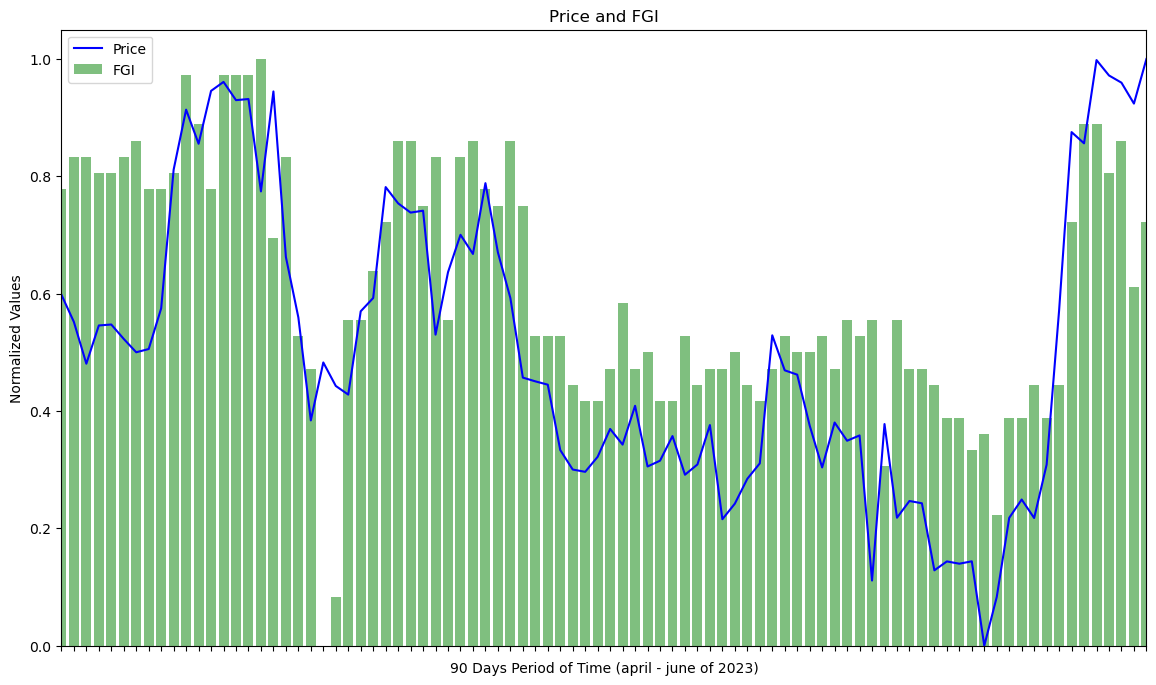

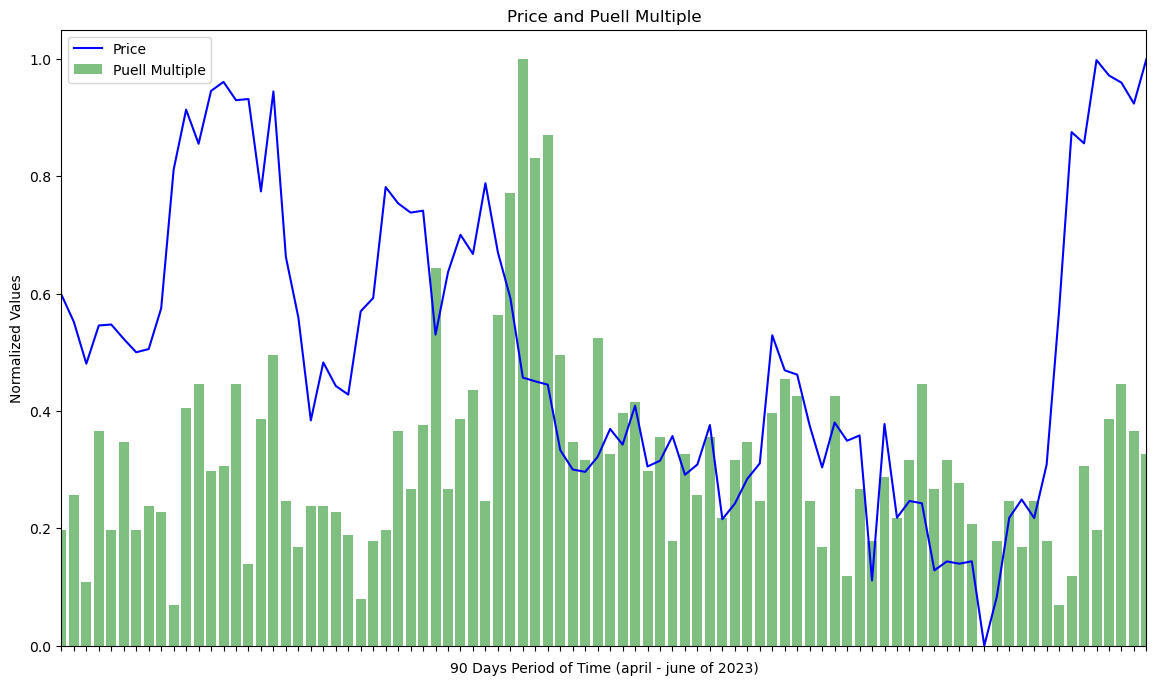

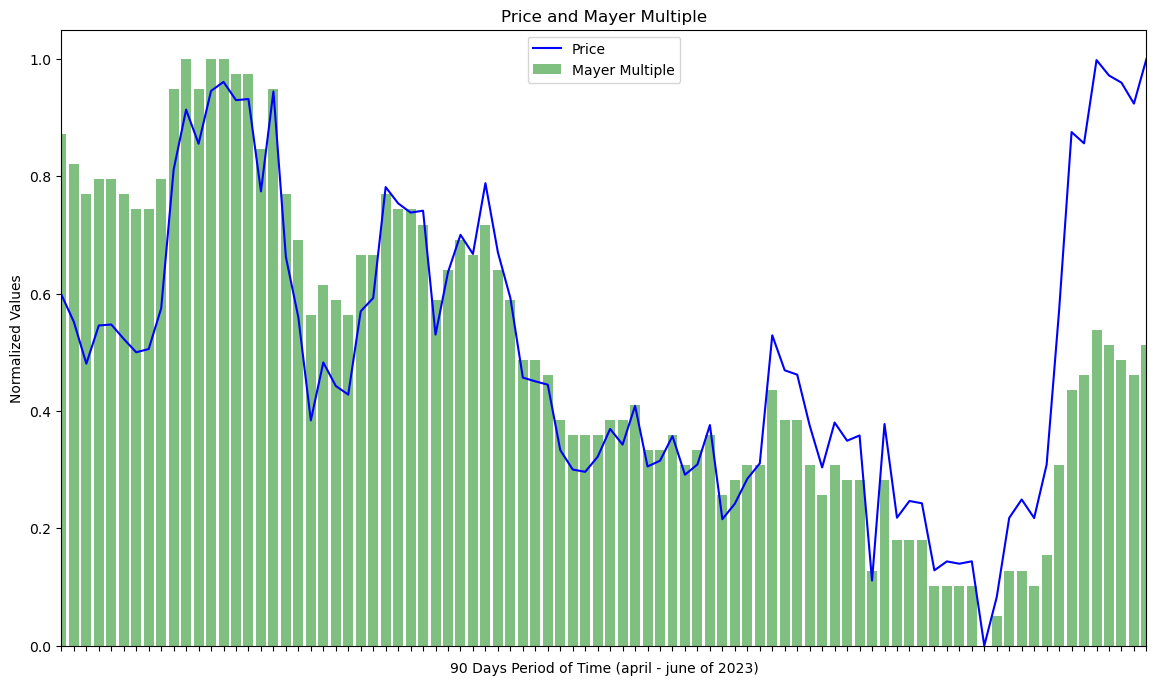

In [12]:
import matplotlib.pyplot as plt

# Set up the figure and axes for FGI chart
fig, ax = plt.subplots(figsize=(14, 8))

# Line plot for Price
ax.plot(Data['Date'], normalized_data['Price'], label='Price', color='blue')

# Bar plot for FGI
ax.bar(Data['Date'], normalized_data['FGI'], label='FGI', color='green', alpha=0.5)

# Set labels and title
ax.set_ylabel('Normalized Values')
ax.set_title('Price and FGI')
ax.set_xlabel("90 Days Period of Time (april - june of 2023)")

# Set a larger scale for the x-axis
ax.set_xlim(Data['Date'].iloc[0], Data['Date'].iloc[-1])

# Remove x-axis labels
ax.set_xticklabels([])

# Add a legend
ax.legend()

# Show the FGI chart
plt.show()

# Set up the figure and axes for Puell Multiple chart
fig, ax = plt.subplots(figsize=(14, 8))

# Line plot for Price
ax.plot(Data['Date'], normalized_data['Price'], label='Price', color='blue')

# Bar plot for Puell Multiple
ax.bar(Data['Date'], normalized_data['Puell Multiple'], label='Puell Multiple', color='green', alpha=0.5)

# Set labels and title
ax.set_ylabel('Normalized Values')
ax.set_title('Price and Puell Multiple')
ax.set_xlabel("90 Days Period of Time (april - june of 2023)")

# Set a larger scale for the x-axis
ax.set_xlim(Data['Date'].iloc[0], Data['Date'].iloc[-1])

# Remove x-axis labels
ax.set_xticklabels([])

# Add a legend
ax.legend()

# Show the Puell Multiple chart
plt.show()

# Set up the figure and axes for Mayer Multiple chart
fig, ax = plt.subplots(figsize=(14, 8))

# Line plot for Price
ax.plot(Data['Date'], normalized_data['Price'], label='Price', color='blue')

# Bar plot for Mayer Multiple
ax.bar(Data['Date'], normalized_data['Mayer Multiple'], label='Mayer Multiple', color='green', alpha=0.5)

# Set labels and title
ax.set_ylabel('Normalized Values')
ax.set_title('Price and Mayer Multiple')
ax.set_xlabel("90 Days Period of Time (april - june of 2023)")

# Set a larger scale for the x-axis
ax.set_xlim(Data['Date'].iloc[0], Data['Date'].iloc[-1])

# Remove x-axis labels
ax.set_xticklabels([])

# Add a legend
ax.legend()

# Show the Mayer Multiple chart
plt.show()


In [13]:
import scipy.stats as stats

# Calculate confidence intervals for mean price
price_mean = Data['Price'].mean()
price_std = Data['Price'].std()
price_n = len(Data['Price'])
price_ci = stats.norm.interval(0.95, loc=price_mean, scale=price_std / (price_n ** 0.5))

# Calculate confidence intervals for daily variance
variance_mean = Data['Daily Variance'].mean()
variance_std = Data['Daily Variance'].std()
variance_n = len(Data['Daily Variance'])
variance_ci = stats.norm.interval(0.95, loc=variance_mean, scale=variance_std / (variance_n ** 0.5))

# Calculate confidence intervals for FGI
fgi_mean = Data['FGI'].mean()
fgi_std = Data['FGI'].std()
fgi_n = len(Data['FGI'])
fgi_ci = stats.norm.interval(0.95, loc=fgi_mean, scale=fgi_std / (fgi_n ** 0.5))

# Calculate confidence intervals for Puell Multiple
puell_mean = Data['Puell Multiple'].mean()
puell_std = Data['Puell Multiple'].std()
puell_n = len(Data['Puell Multiple'])
puell_ci = stats.norm.interval(0.95, loc=puell_mean, scale=puell_std / (puell_n ** 0.5))

# Calculate confidence intervals for Mayer Multiple
mayer_mean = Data['Mayer Multiple'].mean()
mayer_std = Data['Mayer Multiple'].std()
mayer_n = len(Data['Mayer Multiple'])
mayer_ci = stats.norm.interval(0.95, loc=mayer_mean, scale=mayer_std / (mayer_n ** 0.5))

# Print confidence intervals
print("Confidence Interval for Mean Price: ", price_ci)
print("Confidence Interval for Daily Variance: ", variance_ci)
print("Confidence Interval for FGI: ", fgi_ci)
print("Confidence Interval for Puell Multiple: ", puell_ci)
print("Confidence Interval for Mayer Multiple: ", mayer_ci)


Confidence Interval for Mean Price:  (27648.120852805252, 28242.67914719473)
Confidence Interval for Daily Variance:  (2.8621347122929524, 3.5874971067546206)
Confidence Interval for FGI:  (53.326993668123954, 56.51391542278514)
Confidence Interval for Puell Multiple:  (1.2544280009424453, 1.3260265445121016)
Confidence Interval for Mayer Multiple:  (1.2329462690578765, 1.2763719127603057)


In [14]:
Data['PriceFGI'] = Data['Price'] / Data['FGI']

In [15]:
Data['PricePM'] = Data['Price'] / Data['Puell Multiple']

In [16]:
Data['PriceMM'] = Data['Price'] / Data['Mayer Multiple']

In [17]:
import pandas as pd

# Assuming you already have your dataset loaded into a dataframe called "Data"

# Sort the dataset by the "Price" column in descending order
sorted_data = Data.sort_values(by='Price', ascending=False)

# Get the top 40 values for "Price" and create df_a
df_a = sorted_data.head(40)

# Get the lowest 40 values for "Price" and create df_b
df_b = sorted_data.tail(40)

# Get the remaining values and create df_c
df_c = sorted_data[~sorted_data.index.isin(df_a.index) & ~sorted_data.index.isin(df_b.index)]

# Reset the index for each dataframe
df_a.reset_index(drop=True, inplace=True)
df_b.reset_index(drop=True, inplace=True)
df_c.reset_index(drop=True, inplace=True)

In [18]:
# Defining the row ranges for the three DataFrames
ranges = [(0, 29), (30, 59), (60, 89)]

# Creating empty DataFrames for each range
df_1 = pd.DataFrame()
df_2 = pd.DataFrame()
df_3 = pd.DataFrame()

# Iterate over the ranges
for i, (start, end) in enumerate(ranges):
    # Select the rows within the range
    df_range = Data.loc[start:end]

    # Assigning the selected rows to the corresponding DataFrame
    if i == 0:
        df_1 = df_range
    elif i == 1:
        df_2 = df_range
    elif i == 2:
        df_3 = df_range

In [19]:
# Calculate correlation between Price and FGI in df_1
corr_1 = df_1['Price'].corr(df_1['FGI'])

# Calculate correlation between Price and FGI in df_2
corr_2 = df_2['Price'].corr(df_2['FGI'])

# Calculate correlation between Price and FGI in df_3
corr_3 = df_3['Price'].corr(df_3['FGI'])

# Print the correlations
print("Correlation between Price and FGI in df_1:", corr_1)
print("Correlation between Price and FGI in df_2:", corr_2)
print("Correlation between Price and FGI in df_3:", corr_3)


import scipy.stats as stats


import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

st.f_oneway(df_1['PriceFGI'],df_2['PriceFGI'],df_3['PriceFGI'])


Correlation between Price and FGI in df_1: 0.5630015515418609
Correlation between Price and FGI in df_2: 0.7868931707998625
Correlation between Price and FGI in df_3: 0.8565323594969831


F_onewayResult(statistic=3.0255952837189204, pvalue=0.053785488063107276)

In [20]:
import pandas as pd
import scipy.stats as stats

# Calculate correlation between Price and FGI in df_1
corr_1 = df_1['Price'].corr(df_1['FGI'])

# Calculate correlation between Price and FGI in df_2
corr_2 = df_2['Price'].corr(df_2['FGI'])

# Calculate correlation between Price and FGI in df_3
corr_3 = df_3['Price'].corr(df_3['FGI'])

# Print the correlations
print("Correlation between Price and FGI in df_1:", corr_1)
print("Correlation between Price and FGI in df_2:", corr_2)
print("Correlation between Price and FGI in df_3:", corr_3)

# Calculate the p-value using one-way ANOVA
f_value, p_value = stats.f_oneway(df_1['PriceFGI'], df_2['PriceFGI'], df_3['PriceFGI'])
# Print the p-value
print("One-way ANOVA p-value:", p_value)


Correlation between Price and FGI in df_1: 0.5630015515418609
Correlation between Price and FGI in df_2: 0.7868931707998625
Correlation between Price and FGI in df_3: 0.8565323594969831
One-way ANOVA p-value: 0.053785488063107276


In [21]:
# Calculate correlation between Price and FGI in df_1
corr_1 = df_1['Price'].corr(df_1['Mayer Multiple'])

# Calculate correlation between Price and FGI in df_2
corr_2 = df_2['Price'].corr(df_2['Mayer Multiple'])

# Calculate correlation between Price and FGI in df_3
corr_3 = df_3['Price'].corr(df_3['Mayer Multiple'])

# Print the correlations
print("Correlation between Price and Mayer Multiple in df_1:", corr_1)
print("Correlation between Price and Mayer Multiple in df_2:", corr_2)
print("Correlation between Price and Mayer Multiple in df_3:", corr_3)



st.f_oneway(df_1['PriceMM'],df_2['PriceMM'],df_3['PriceMM'])

Correlation between Price and Mayer Multiple in df_1: 0.850127120576372
Correlation between Price and Mayer Multiple in df_2: 0.9637478650359409
Correlation between Price and Mayer Multiple in df_3: 0.9690124699286974


F_onewayResult(statistic=309.0835059034589, pvalue=1.0007338630905891e-39)

In [22]:
import pandas as pd
import scipy.stats as stats

# Calculate correlation between Price and Mayer Multiple in df_1
corr_1 = df_1['Price'].corr(df_1['Mayer Multiple'])

# Calculate correlation between Price and Mayer Multiple in df_2
corr_2 = df_2['Price'].corr(df_2['Mayer Multiple'])

# Calculate correlation between Price and Mayer Multiple in df_3
corr_3 = df_3['Price'].corr(df_3['Mayer Multiple'])

# Print the correlations
print("Correlation between Price and Mayer Multiple in df_1:", corr_1)
print("Correlation between Price and Mayer Multiple in df_2:", corr_2)
print("Correlation between Price and Mayer Multiple in df_3:", corr_3)

# Combine the PriceMM columns from the three dataframes
combined_data = pd.concat([df_1['PriceMM'], df_2['PriceMM'], df_3['PriceMM']], axis=0)

# Calculate the p-value using one-way ANOVA
f_value, p_value = stats.f_oneway(df_1['PriceMM'], df_2['PriceMM'], df_3['PriceMM'])

# Print the p-value
print("One-way ANOVA p-value:", p_value)


Correlation between Price and Mayer Multiple in df_1: 0.850127120576372
Correlation between Price and Mayer Multiple in df_2: 0.9637478650359409
Correlation between Price and Mayer Multiple in df_3: 0.9690124699286974
One-way ANOVA p-value: 1.0007338630905891e-39


In [23]:
# Calculate the p-value using one-way ANOVA
f_value, p_value = stats.f_oneway(df_a['PriceMM'], df_a['PriceMM'], df_c['PriceMM'])

# Print the p-value
print("One-way ANOVA p-value:", p_value)

One-way ANOVA p-value: 0.9981433799079965


In [24]:
# Calculate correlation between Price and FGI in df_1
corr_1 = df_1['Price'].corr(df_1['Puell Multiple'])

# Calculate correlation between Price and FGI in df_2
corr_2 = df_2['Price'].corr(df_2['Puell Multiple'])

# Calculate correlation between Price and FGI in df_3
corr_3 = df_3['Price'].corr(df_3['Puell Multiple'])

# Print the correlations
print("Correlation between Price and Puell Multiple in df_1:", corr_1)
print("Correlation between Price and Puell Multiple in df_2:", corr_2)
print("Correlation between Price and Puell Multiple in df_3:", corr_3)


st.f_oneway(df_1['PricePM'],df_2['PricePM'],df_3['PricePM'])

Correlation between Price and Puell Multiple in df_1: 0.472123753074411
Correlation between Price and Puell Multiple in df_2: 0.2579624174644032
Correlation between Price and Puell Multiple in df_3: 0.3259250214420935


F_onewayResult(statistic=22.488182676413984, pvalue=1.4489981903855185e-08)

In [25]:
import pandas as pd
import scipy.stats as stats

# Calculate correlation between Price and Puell Multiple in df_1
corr_1 = df_1['Price'].corr(df_1['Puell Multiple'])

# Calculate correlation between Price and Puell Multiple in df_2
corr_2 = df_2['Price'].corr(df_2['Puell Multiple'])

# Calculate correlation between Price and Puell Multiple in df_3
corr_3 = df_3['Price'].corr(df_3['Puell Multiple'])

# Print the correlations
print("Correlation between Price and Puell Multiple in df_1:", corr_1)
print("Correlation between Price and Puell Multiple in df_2:", corr_2)
print("Correlation between Price and Puell Multiple in df_3:", corr_3)

# Combine the PricePM columns from the three dataframes
combined_data = pd.concat([df_1['PricePM'], df_2['PricePM'], df_3['PricePM']], axis=0)

# Calculate the p-value using one-way ANOVA
f_value, p_value = stats.f_oneway(df_1['PricePM'], df_2['PricePM'], df_3['PricePM'])

# Print the p-value
print("One-way ANOVA p-value:", p_value)


Correlation between Price and Puell Multiple in df_1: 0.472123753074411
Correlation between Price and Puell Multiple in df_2: 0.2579624174644032
Correlation between Price and Puell Multiple in df_3: 0.3259250214420935
One-way ANOVA p-value: 1.4489981903855185e-08


In [26]:
# Calculate the p-value using one-way ANOVA
f_value, p_value = stats.f_oneway(df_a['PricePM'], df_b['PricePM'], df_c['PricePM'])

# Print the p-value
print("One-way ANOVA p-value:", p_value)


One-way ANOVA p-value: 0.0005757282348140848


In [27]:
Data.tail(10)

,Date,Price,Open,High,Low,Vol.,Change %,FGI,Puell Multiple,Mayer Multiple,Daily Variance,PriceFGI,PricePM,PriceMM
78,"Jun 18, 2023",26339.700000,26515.000000,26679.300000,26290.600000,27.310000,-0.660000,49,1.220000,1.100000,1.478475,537.544898,21589.918033,23945.181818
79,"Jun 19, 2023",26845.900000,26339.700000,27029.700000,26295.100000,46.450000,1.920000,47,1.150000,1.120000,2.793676,571.189362,23344.260870,23969.553571
80,"Jun 20, 2023",28307.700000,26845.900000,28393.000000,26665.500000,100.550000,5.440000,49,1.040000,1.180000,6.478408,577.708163,27218.942308,23989.576271
81,"Jun 21, 2023",29996.900000,28307.700000,30769.500000,28270.500000,143.490000,5.970000,59,1.090000,1.230000,8.839603,508.422034,27520.091743,24387.723577
82,"Jun 22, 2023",29890.500000,29992.800000,30497.800000,29590.400000,79.220000,-0.350000,65,1.280000,1.240000,3.066535,459.853846,23351.953125,24105.241935
83,"Jun 23, 2023",30679.400000,29890.200000,31395.400000,29822.600000,98.850000,2.640000,65,1.170000,1.270000,5.273853,471.990769,26221.709402,24157.007874
84,"Jun 24, 2023",30533.600000,30680.700000,30795.300000,30269.400000,38.150000,-0.480000,62,1.360000,1.260000,1.737398,492.477419,22451.176471,24233.015873
85,"Jun 25, 2023",30465.300000,30533.600000,31040.200000,30315.800000,37.120000,-0.220000,64,1.420000,1.250000,2.389513,476.020312,21454.436620,24372.240000
86,"Jun 26, 2023",30267.000000,30466.300000,30645.900000,29986.300000,58.710000,-0.650000,55,1.340000,1.240000,2.199671,550.309091,22587.313433,24408.870968
87,"Jun 27, 2023",30689.100000,30267.000000,30993.700000,30231.300000,55.820000,1.390000,59,1.300000,1.260000,2.521890,520.154237,23607.000000,24356.428571


In [28]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Select the features (metrics) and target (BTC Price)
features = Data[['FGI', 'Puell Multiple', 'Mayer Multiple']]
target = Data['Price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for the next 5 days
next_5_days_features = Data[['FGI', 'Puell Multiple', 'Mayer Multiple']].tail(5)
predictions = model.predict(next_5_days_features)

# Print the predicted prices for the next 5 days
print("Predicted Prices for the Next 5 Days:")
for i, prediction in enumerate(predictions):
    print("Day", i+1, ":", prediction)


Predicted Prices for the Next 5 Days:
Day 1 : 28683.645353792705
Day 2 : 28403.228965618873
Day 3 : 28454.655255758786
Day 4 : 27806.121128960396
Day 5 : 28213.87194923759


In [29]:
import pandas as pd
import numpy as np


# Select the features (metrics) and target (Price)
features = Data[['FGI', 'Puell Multiple', 'Mayer Multiple']]
target = Data['Price']

# Calculate the correlation coefficients
correlation_matrix = np.corrcoef(features.values.T, target.values)
correlation_metrics_price = correlation_matrix[:-1, -1]

# Print the correlation coefficients
print("Correlation Coefficients with Price:")
for i, metric in enumerate(['FGI', 'Puell Multiple', 'Mayer Multiple']):
    print(metric, ":", correlation_metrics_price[i])


Correlation Coefficients with Price:
FGI : 0.7498074750801293
Puell Multiple : 0.11719329315612984
Mayer Multiple : 0.795719157361489


In [30]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Select the features (metrics) and target (Price)
features = Data[['FGI', 'Puell Multiple', 'Mayer Multiple']]
target = Data['Price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the correlation coefficients
correlation_metrics_price = [0.7498074750801293, 0.11719329315612984, 0.795719157361489]

# Adjust the coefficients based on the correlation coefficients
adjusted_coefficients = model.coef_ * correlation_metrics_price

# Adjust the intercept based on the correlation coefficients
adjusted_intercept = model.intercept_

# Make predictions for the next day
next_day_features = Data[['FGI', 'Puell Multiple', 'Mayer Multiple']].tail(1)
next_day_prediction = model.predict(next_day_features)

# Print the adjusted coefficients and intercept
print("Adjusted Coefficients:", adjusted_coefficients)
print("Adjusted Intercept:", adjusted_intercept)
print("Predicted Price for the Next Day:", next_day_prediction[0])


Adjusted Coefficients: [  48.38645952   -8.27876404 5840.48961882]
Adjusted Intercept: 15250.068585502531
Predicted Price for the Next Day: 28213.87194923759


In [31]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Select the features (metrics) and target (Price)
features = Data[['FGI']]
target = Data['Price']

# Create lagged feature
lagged_fgi = features.shift(1)
lagged_fgi.columns = ['FGI Lagged']

# Combine lagged feature with original features
features = pd.concat([lagged_fgi, features], axis=1).dropna()
target = target.iloc[1:]  # Remove the first row to align with the lagged feature

# Train the linear regression model
model = LinearRegression()
model.fit(features, target)

# Get the last row features for prediction
last_row_features = features.tail(1)

# Predict the price for the next day
next_day_price_prediction = model.predict(last_row_features)

# Print the predicted price for the next day
print("Predicted Price for the Next Day:")
print(next_day_price_prediction[0])


Predicted Price for the Next Day:
28321.62850363648


In [32]:
import pandas as pd

# Select the features (metrics) and target (Price)
features = Data[['FGI', 'Puell Multiple', 'Mayer Multiple']]
target = Data['Price']

# Calculate average price change for different time frames after each metric
time_frames = [1, 3, 5, 7]  # Define the time frames to analyze
avg_price_changes = {}  # Dictionary to store average price changes

for metric in features.columns:
    avg_price_changes[metric] = {}
    
    for time_frame in time_frames:
        target_shifted = target.shift(-time_frame)  # Shift the target variable forward by the time frame
        
        # Calculate the price change for the time frame
        price_change = (target_shifted - target) / target
        avg_price_change = price_change.corr(features[metric])
        
        avg_price_changes[metric][time_frame] = avg_price_change

# Print the average price changes for each metric and time frame
for metric in avg_price_changes:
    print(f"Average Price Changes for {metric}:")
    for time_frame, avg_price_change in avg_price_changes[metric].items():
        print(f"After {time_frame} days: {avg_price_change:.4f}")
    print()


Average Price Changes for FGI:
After 1 days: -0.0463
After 3 days: -0.2461
After 5 days: -0.3783
After 7 days: -0.4176

Average Price Changes for Puell Multiple:
After 1 days: -0.2616
After 3 days: -0.4040
After 5 days: -0.3738
After 7 days: -0.3872

Average Price Changes for Mayer Multiple:
After 1 days: -0.1577
After 3 days: -0.2622
After 5 days: -0.3453
After 7 days: -0.4075



In [33]:
import pandas as pd


# Select the features (metrics) and target (Price)
features = Data[['FGI', 'Puell Multiple', 'Mayer Multiple']]
target = Data['Price']

# Set the date for analysis
analysis_date = 'May 06, 2023'

# Get the index of the analysis date
analysis_index = Data[Data['Date'] == analysis_date].index[0]

# Define the number of previous days to consider
num_previous_days = 5

# Calculate the average correlation of the metrics for the previous days
previous_days_metrics = features.iloc[analysis_index - num_previous_days:analysis_index]
avg_correlation = previous_days_metrics.corr().mean().mean()

# Get the price on the analysis date
price = target.iloc[analysis_index]

# Print the results
print(f"Average Correlation of Metrics for the Previous {num_previous_days} Days: {avg_correlation:.4f}")
print(f"Price on {analysis_date}: {price}")


Average Correlation of Metrics for the Previous 5 Days: 0.3168
Price on May 06, 2023: 28857.1


In [34]:
import pandas as pd

# Select the features (metrics) and target (Price)
features = Data[['FGI', 'Puell Multiple', 'Mayer Multiple']]
target = Data['Price']

# Calculate the correlation between metrics and price
correlation_metrics_price = [0.7498074750801293, 0.11719329315612984, 0.795719157361489]

# Define the number of previous days to consider
num_previous_days = 5

# Initialize lists to store the average correlation and weighted average
avg_correlation_list = []
weighted_average_list = []

# Iterate over the days
for i in range(num_previous_days, len(Data)):
    # Calculate the average correlation of the metrics for the previous days
    previous_days_metrics = features.iloc[i - num_previous_days:i]
    avg_correlation = previous_days_metrics.corr().mean().mean()
    avg_correlation_list.append(avg_correlation)

    # Calculate the weighted average based on the correlation coefficients
    weighted_average = (correlation_metrics_price * previous_days_metrics.mean(axis=0)).sum()
    weighted_average_list.append(weighted_average)

# Calculate the mean of the average correlation and weighted average
mean_avg_correlation = sum(avg_correlation_list) / len(avg_correlation_list)
mean_weighted_average = sum(weighted_average_list) / len(weighted_average_list)

# Print the mean of the average correlation and weighted average
print(f"Mean Average Correlation: {mean_avg_correlation:.4f}")
print(f"Mean Weighted Average: {mean_weighted_average:.4f}")


Mean Average Correlation: 0.4385
Mean Weighted Average: 42.0669


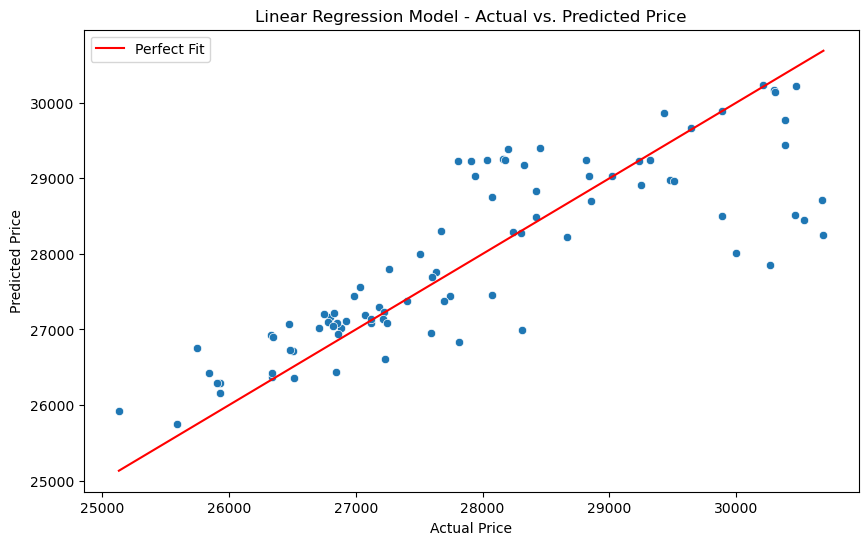

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Select the features (metrics) and target (Price)
features = Data[['FGI', 'Puell Multiple', 'Mayer Multiple']]
target = Data['Price']

# Create a linear regression model
model = LinearRegression()
model.fit(features, target)

# Make predictions
predictions = model.predict(features)

# Plot the actual values and the predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=target, y=predictions)
sns.lineplot(x=target, y=target, color='red', label='Perfect Fit')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression Model - Actual vs. Predicted Price')
plt.legend()
plt.show()


In [36]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Select the features (metrics) and target (Price, Daily Variance)
features = Data[['FGI', 'Puell Multiple', 'Mayer Multiple']]
target_price = Data['Price']
target_variance = Data['Daily Variance']

# Create a linear regression model for Price
model_price = LinearRegression()
model_price.fit(features, target_price)

# Create a linear regression model for Daily Variance
model_variance = LinearRegression()
model_variance.fit(features, target_variance)

# Create the input for prediction (new metrics for 28th June 2023)
new_metrics = pd.DataFrame({'FGI': [54], 'Puell Multiple': [0.99], 'Mayer Multiple': [1.23]})

# Predict the Price and Daily Variance for the next day
predicted_price = model_price.predict(new_metrics)
predicted_variance = model_variance.predict(new_metrics)

# Print the predicted Price and Daily Variance for the next day
print("Predicted Price for 28th June 2023:", predicted_price[0])
print("Predicted Daily Variance for 28th June 2023:", predicted_variance[0])


Predicted Price for 28th June 2023: 27681.61999575118
Predicted Daily Variance for 28th June 2023: 3.5387615802540386


In [37]:
import pandas as pd
from sklearn.linear_model import LinearRegression



# Select the features (metrics) and target (Price, Daily Variance)
features = Data[['FGI', 'Puell Multiple', 'Mayer Multiple']]
target_price = Data['Price']
target_variance = Data['Daily Variance']

# Create a linear regression model for Price
model_price = LinearRegression()
model_price.fit(features, target_price)

# Create a linear regression model for Daily Variance
model_variance = LinearRegression()
model_variance.fit(features, target_variance)

# Get the last day's metrics
last_day_metrics = features.tail(1)

# Create the input for prediction (new metrics for 28th June 2023)
new_metrics = pd.DataFrame({'FGI': [54], 'Puell Multiple': [0.99], 'Mayer Multiple': [1.23]})

# Combine the last day's metrics with the new metrics
input_metrics = pd.concat([last_day_metrics, new_metrics], ignore_index=True)

# Predict the Price and Daily Variance for the next day
predicted_price = model_price.predict(input_metrics)
predicted_variance = model_variance.predict(input_metrics)

# Print the predicted Price and Daily Variance for the next day
print("Predicted Price for 28th June 2023:", predicted_price[1])
print("Predicted Daily Variance for 28th June 2023:", predicted_variance[1])


Predicted Price for 28th June 2023: 27681.61999575118
Predicted Daily Variance for 28th June 2023: 3.5387615802540386


In [38]:
import pandas as pd

# Calculate the percentage change of the metrics and price
metrics_change = Data[['FGI', 'Puell Multiple', 'Mayer Multiple']].pct_change() * 100
price_change = Data['Price'].pct_change() * 100

# Calculate the overall percentage change for metrics and price
metrics_change_overall = metrics_change.mean()
price_change_overall = price_change.mean()

# Print the overall change percentages for metrics and price
print("Overall Metrics Change Percentage:")
print(metrics_change_overall)
print("\nOverall Price Change Percentage:")
print(price_change_overall)


Overall Metrics Change Percentage:
FGI               0.408752
Puell Multiple    0.835192
Mayer Multiple   -0.098990
dtype: float64

Overall Price Change Percentage:
0.10991898602388889


In [39]:
import pandas as pd

# Calculate the average percentage change for each metric
metrics_change_percentage = Data[['FGI', 'Puell Multiple', 'Mayer Multiple']].pct_change().mean()

# Calculate the overall average price change
price_change_percentage = Data['Change %'].mean()

# Calculate the estimated price change based on the average metric changes
estimated_price_change = (
    metrics_change_percentage['FGI'] * correlation_metrics_price[0] +
    metrics_change_percentage['Puell Multiple'] * correlation_metrics_price[1] +
    metrics_change_percentage['Mayer Multiple'] * correlation_metrics_price[2]
) * price_change_percentage

# Estimate the next day's price based on the previous day's price and the estimated price change
previous_day_price = Data['Price'].iloc[-1]
estimated_next_day_price = previous_day_price * (1 + estimated_price_change)

# Print the estimated next day's price
print("Estimated Next Day's Price:", estimated_next_day_price)


Estimated Next Day's Price: 30699.887100992783


In [40]:
import pandas as pd

# Calculate the average percentage change for each metric
metrics_change_percentage = Data[['FGI', 'Puell Multiple', 'Mayer Multiple']].pct_change().mean()

# Calculate the overall average price change
price_change_percentage = Data['Change %'].mean()

# Calculate the estimated price change based on the average metric changes
estimated_price_change = (
    (metrics_change_percentage['FGI'] + (54 - Data['FGI'].iloc[-1]) / Data['FGI'].iloc[-1]) * correlation_metrics_price[0] +
    (metrics_change_percentage['Puell Multiple'] + (0.99 - Data['Puell Multiple'].iloc[-1]) / Data['Puell Multiple'].iloc[-1]) * correlation_metrics_price[1] +
    (metrics_change_percentage['Mayer Multiple'] + (1.23 - Data['Mayer Multiple'].iloc[-1]) / Data['Mayer Multiple'].iloc[-1]) * correlation_metrics_price[2]
) * price_change_percentage

# Estimate the next day's price based on the previous day's price and the estimated price change
previous_day_price = Data['Price'].iloc[-1]
estimated_next_day_price = previous_day_price * (1 + estimated_price_change)

# Print the estimated next day's price
print("Estimated Next Day's Price:", estimated_next_day_price)


Estimated Next Day's Price: 30334.013555293634


In [41]:
import numpy as np
import scipy.stats as st

# Calculate the mean and standard deviation of the 'Daily Variance' column
mean_daily_variance = Data['Daily Variance'].mean()
std_daily_variance = Data['Daily Variance'].std()

# Calculate the standard error of the mean
n = len(Data)
sem_daily_variance = std_daily_variance / np.sqrt(n)

# Set the desired confidence level
confidence_level = 0.95

# Calculate the critical value from the t-distribution
df = n - 1  # Degrees of freedom
critical_value = st.t.ppf((1 + confidence_level) / 2, df)

# Calculate the margin of error
margin_of_error = critical_value * sem_daily_variance

# Calculate the lower and upper bounds of the confidence interval
lower_bound = mean_daily_variance - margin_of_error
upper_bound = mean_daily_variance + margin_of_error

# Print the confidence interval
print("Confidence Interval for Mean Daily Variance:")
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


Confidence Interval for Mean Daily Variance:
Lower Bound: 2.857019278144381
Upper Bound: 3.592612540903192


In [44]:
import pandas as pd
import numpy as np
import scipy.stats as st

# Set the desired confidence level
confidence_level = 0.95

# Calculate the average percentage change for each metric
metrics_change_percentage = Data[['FGI', 'Puell Multiple', 'Mayer Multiple']].pct_change().mean()
price_change_percentage = Data['Change %'].mean()

# Calculate the confidence intervals for the average metric changes
std_errors = Data[['FGI', 'Puell Multiple', 'Mayer Multiple']].pct_change().sem()
df = len(Data) - 1  # Degrees of freedom
critical_values = st.t.ppf((1 + confidence_level) / 2, df)
margins_of_error = critical_values * std_errors
lower_bounds = metrics_change_percentage - margins_of_error
upper_bounds = metrics_change_percentage + margins_of_error

# Estimate the next day's price based on the previous day's price and the estimated price change
previous_day_price = Data['Price'].iloc[-1]
estimated_price_change = (
    (metrics_change_percentage['FGI'] + (54 - Data['FGI'].iloc[-1]) / Data['FGI'].iloc[-1]) * (price_change_percentage/100) +
    (metrics_change_percentage['Puell Multiple'] + (0.99 - Data['Puell Multiple'].iloc[-1]) / Data['Puell Multiple'].iloc[-1]) * (price_change_percentage/100) +
    (metrics_change_percentage['Mayer Multiple'] + (1.23 - Data['Mayer Multiple'].iloc[-1]) / Data['Mayer Multiple'].iloc[-1]) * (price_change_percentage/100)
)

estimated_next_day_price = previous_day_price * (1 + estimated_price_change)

# Calculate the high and low values of the estimated next day's price based on the confidence intervals
lower_bound_price = previous_day_price * (1 + lower_bounds.mean() * (price_change_percentage/100))
upper_bound_price = previous_day_price * (1 + upper_bounds.mean() * (price_change_percentage/100))

# Estimate the daily variance based on the high and low values of the estimated next day's price
estimated_daily_variance_high = upper_bound_price - lower_bound_price
estimated_daily_variance_low = lower_bound_price - upper_bound_price

# Print the estimated next day's price and estimated daily variance
print("Estimated Next Day's Price:", estimated_next_day_price)
print("Estimated Daily Variance (High):", estimated_daily_variance_high)
print("Estimated Daily Variance (Low):", estimated_daily_variance_low)


Estimated Next Day's Price: 30677.982562568028
Estimated Daily Variance (High): 1.1201838700690132
Estimated Daily Variance (Low): -1.1201838700690132


In [43]:
Data

,Date,Price,Open,High,Low,Vol.,Change %,FGI,Puell Multiple,Mayer Multiple,Daily Variance,PriceFGI,PricePM,PriceMM
0,"Apr 01, 2023",28456.100000,28473.700000,28795.100000,28285.600000,38.090000,-0.060000,61,1.170000,1.400000,1.801270,466.493443,24321.452991,20325.785714
1,"Apr 02, 2023",28198.300000,28456.100000,28522.800000,27871.700000,45.040000,-0.910000,63,1.230000,1.380000,2.336061,447.592063,22925.447154,20433.550725
2,"Apr 03, 2023",27802.100000,28194.700000,28458.400000,27256.900000,98.000000,-1.410000,63,1.080000,1.360000,4.408058,441.303175,25742.685185,20442.720588
3,"Apr 04, 2023",28164.400000,27802.200000,28429.100000,27668.900000,64.060000,1.300000,62,1.340000,1.370000,2.747489,454.264516,21018.208955,20557.956204
4,"Apr 05, 2023",28173.500000,28164.400000,28744.400000,27823.500000,77.320000,0.030000,62,1.170000,1.370000,3.309792,454.411290,24079.914530,20564.598540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,"Jun 23, 2023",30679.400000,29890.200000,31395.400000,29822.600000,98.850000,2.640000,65,1.170000,1.270000,5.273853,471.990769,26221.709402,24157.007874
84,"Jun 24, 2023",30533.600000,30680.700000,30795.300000,30269.400000,38.150000,-0.480000,62,1.360000,1.260000,1.737398,492.477419,22451.176471,24233.015873
85,"Jun 25, 2023",30465.300000,30533.600000,31040.200000,30315.800000,37.120000,-0.220000,64,1.420000,1.250000,2.389513,476.020312,21454.436620,24372.240000
86,"Jun 26, 2023",30267.000000,30466.300000,30645.900000,29986.300000,58.710000,-0.650000,55,1.340000,1.240000,2.199671,550.309091,22587.313433,24408.870968


In [ ]:
import pandas as pd

# assuming your DataFrame is named "Data"
Data.to_excel('filename.xlsx', index=False)


In [46]:
import pandas as pd
import numpy as np
import scipy.stats as st


# Set the desired confidence levels
confidence_levels = [0.95, 0.90, 0.80]

# Set the desired confidence level
price_change_percentage = Data['Change %'].mean()

# Calculate the average percentage change for each metric
metrics_change_percentage = Data[['FGI', 'Puell Multiple', 'Mayer Multiple']].pct_change().mean()

# Calculate the confidence intervals for the average metric changes
std_errors = Data[['FGI', 'Puell Multiple', 'Mayer Multiple']].pct_change().sem()
df = len(Data) - 1  # Degrees of freedom
margins_of_error = st.t.ppf((1 + np.array(confidence_levels)) / 2, df) * std_errors
lower_bounds = metrics_change_percentage - margins_of_error
upper_bounds = metrics_change_percentage + margins_of_error

# Estimate the next day's price based on the previous day's price and the estimated price change
previous_day_price = Data['Price'].iloc[-1]
estimated_price_change = (
    (metrics_change_percentage['FGI'] + (54 - Data['FGI'].iloc[-1]) / Data['FGI'].iloc[-1]) * (price_change_percentage/100) +
    (metrics_change_percentage['Puell Multiple'] + (0.99 - Data['Puell Multiple'].iloc[-1]) / Data['Puell Multiple'].iloc[-1]) * (price_change_percentage/100) +
    (metrics_change_percentage['Mayer Multiple'] + (1.23 - Data['Mayer Multiple'].iloc[-1]) / Data['Mayer Multiple'].iloc[-1]) * (price_change_percentage/100)
)

estimated_next_day_price = previous_day_price * (1 + estimated_price_change)

# Calculate the high and low values of the estimated next day's price based on the confidence intervals
lower_bound_price = previous_day_price * (1 + lower_bounds.mean() * (price_change_percentage/100))
upper_bound_price = previous_day_price * (1 + upper_bounds.mean() * (price_change_percentage/100))

# Estimate the daily variance based on the high and low values of the estimated next day's price
estimated_daily_variance_high = upper_bound_price - lower_bound_price
estimated_daily_variance_low = lower_bound_price - upper_bound_price

# Print the estimated next day's price and estimated daily variance
print("Estimated Next Day's Price:", estimated_next_day_price)
print("Estimated Daily Variance (High):", estimated_daily_variance_high)
print("Estimated Daily Variance (Low):", estimated_daily_variance_low)


Estimated Next Day's Price: 30677.982562568028
Estimated Daily Variance (High): 0.9923516053349886
Estimated Daily Variance (Low): -0.9923516053349886


In [50]:
import pandas as pd
import numpy as np
import scipy.stats as st
# Ask the user to choose the confidence level
confidence_level = float(input("Choose the confidence level (0.80, 0.90, or 0.95): "))

# Set the desired confidence level
price_change_percentage = Data['Change %'].mean()

# Calculate the average percentage change for each metric
metrics_change_percentage = Data[['FGI', 'Puell Multiple', 'Mayer Multiple']].pct_change().mean()

# Calculate the confidence intervals for the average metric changes
std_errors = Data[['FGI', 'Puell Multiple', 'Mayer Multiple']].pct_change().sem()
df = len(Data) - 1  # Degrees of freedom
margins_of_error = st.t.ppf((1 + confidence_level) / 2, df) * std_errors
lower_bounds = metrics_change_percentage - margins_of_error
upper_bounds = metrics_change_percentage + margins_of_error

# Estimate the next day's price based on the previous day's price and the estimated price change
previous_day_price = Data['Price'].iloc[-1]
estimated_price_change = (
    (metrics_change_percentage['FGI'] + (54 - Data['FGI'].iloc[-1]) / Data['FGI'].iloc[-1]) * (price_change_percentage/100) +
    (metrics_change_percentage['Puell Multiple'] + (0.99 - Data['Puell Multiple'].iloc[-1]) / Data['Puell Multiple'].iloc[-1]) * (price_change_percentage/100) +
    (metrics_change_percentage['Mayer Multiple'] + (1.23 - Data['Mayer Multiple'].iloc[-1]) / Data['Mayer Multiple'].iloc[-1]) * (price_change_percentage/100)
)

estimated_next_day_price = previous_day_price * (1 + estimated_price_change)

# Calculate the high and low values of the estimated next day's price based on the confidence intervals
lower_bound_price = previous_day_price * (1 + lower_bounds.mean() * (price_change_percentage/100))
upper_bound_price = previous_day_price * (1 + upper_bounds.mean() * (price_change_percentage/100))

# Estimate the daily variance based on the high and low values of the estimated next day's price
estimated_daily_variance_high = upper_bound_price - lower_bound_price
estimated_daily_variance_low = lower_bound_price - upper_bound_price

# Print the estimated next day's price and estimated daily variance
print("Estimated Next Day's Price:", estimated_next_day_price)
print("Estimated Daily Variance (High):", estimated_daily_variance_high)
print("Estimated Daily Variance (Low):", estimated_daily_variance_low)


Choose the confidence level (0.80, 0.90, or 0.95): 0.95
Estimated Next Day's Price: 30677.982562568028
Estimated Daily Variance (High): 1.1201838700690132
Estimated Daily Variance (Low): -1.1201838700690132
